### __UPI Payments VS Card Payments VS Cash Payments__

In [7]:
import pandas as pd
df = pd.read_csv(r"C:\Users\lakshita rawat\Downloads\Jupyter_files\rbi_processed_2.csv")
df.dropna()

,Month,Year,UPI Transactions-Volume(Lakh),UPI Transactions-Value(Crores),Card Payments-Volume(Lakh),Card Payments-Value(Crores),Cash Payemnts-Volume(Lakh),Cash Payemnts-Value(Crores)
0,Jun,2025,183950,2403931,5673,218552,4382,229907
1,May,2025,186775,2514297,5827,226810,4605,246201
2,Apr,2025,178934,2394926,5674,222351,4603,244747
3,Mar,2025,183015,2477222,5790,240549,4984,263892
4,Feb,2025,161062,2196482,5052,201522,4498,235618
...,...,...,...,...,...,...,...,...
63,Mar,2020,12468,206462,5247,98783,5440,248574
64,Feb,2020,13257,222517,6129,120708,6185,283280
65,Jan,2020,13050,216243,6518,129444,6533,295573
66,Dec,2019,13084,202521,6485,128488,6491,290918


In [12]:
print(df.shape) #total rows and columns
print()

print(df.columns)
print()

print(df.isnull().sum())
print()

print(df.duplicated().sum())
print()

print(df.describe())
print()

print(df.info())

(68, 8)

Index(['Month', 'Year', 'UPI Transactions-Volume(Lakh)',
       'UPI Transactions-Value(Crores)', 'Card Payments-Volume(Lakh)',
       'Card Payments-Value(Crores)', 'Cash Payemnts-Volume(Lakh)',
       'Cash Payemnts-Value(Crores)'],
      dtype='object')

Month                             0
Year                              0
UPI Transactions-Volume(Lakh)     0
UPI Transactions-Value(Crores)    0
Card Payments-Volume(Lakh)        0
Card Payments-Value(Crores)       0
Cash Payemnts-Volume(Lakh)        0
Cash Payemnts-Value(Crores)       0
dtype: int64

0

              Year  UPI Transactions-Volume(Lakh)  \
count    68.000000                      68.000000   
mean   2022.176471                   77995.191176   
std       1.683468                   55448.362412   
min    2019.000000                    9996.000000   
25%    2021.000000                   26131.250000   
50%    2022.000000                   66813.500000   
75%    2024.000000                  121277.750000   
max 

In [15]:
df = df.dropna(subset=["Cash Payemnts-Value(Crores)"])
df["Cash Payemnts-Value(Crores)"] = df["Cash Payemnts-Value(Crores)"].fillna(0)


In [16]:
df = df.rename(columns={
    'UPI Transactions-Volume(Lakh)': 'UPI-Volume',
    'Card Payments-Volume(Lakh)': 'Card-Volume',
    'Cash Payemnts-Volume(Lakh)': 'Cash-Volume'})
print(df.columns.tolist())

['Month', 'Year', 'UPI-Volume', 'UPI Transactions-Value(Crores)', 'Card-Volume', 'Card Payments-Value(Crores)', 'Cash-Volume', 'Cash Payemnts-Value(Crores)']


   Year  UPI Share (%)  Card Share (%)  Cash Share (%)
0  2019      50.079264       24.627457       25.293278
1  2020      60.894343       19.199187       19.906470
2  2021      75.139287       12.111530       12.749183
3  2022      84.746680        7.339133        7.914186
4  2023      90.314988        4.498283        5.186729
5  2024      93.279271        3.364671        3.356058
6  2025      94.532605        2.980583        2.486811


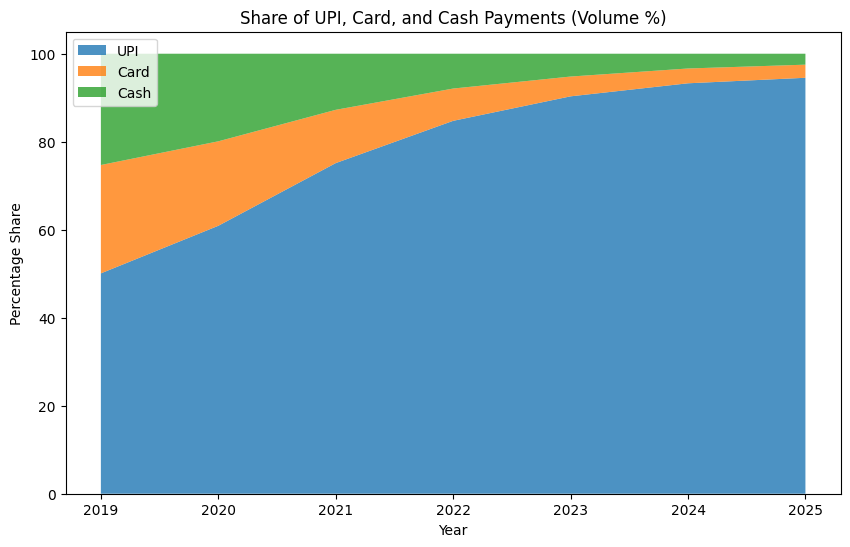

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and sum the volumes
yearly = df.groupby('Year')[
    ['UPI-Volume',
     'Card-Volume',
     'Cash-Volume']
].sum().reset_index()

# Calculate total and percentage share
yearly['Total'] = yearly[['UPI-Volume', 
                          'Card-Volume', 
                          'Cash-Volume']].sum(axis=1)

yearly['UPI Share (%)'] = (yearly['UPI-Volume'] / yearly['Total']) * 100
yearly['Card Share (%)'] = (yearly['Card-Volume'] / yearly['Total']) * 100
yearly['Cash Share (%)'] = (yearly['Cash-Volume'] / yearly['Total']) * 100

print(yearly[['Year', 'UPI Share (%)', 'Card Share (%)', 'Cash Share (%)']])

# Plot stacked area chart
plt.figure(figsize=(10,6))
plt.stackplot(yearly['Year'],
              yearly['UPI Share (%)'],
              yearly['Card Share (%)'],
              yearly['Cash Share (%)'],
              labels=['UPI', 'Card', 'Cash'],
              alpha=0.8)

plt.title("Share of UPI, Card, and Cash Payments (Volume %)")
plt.xlabel("Year")
plt.ylabel("Percentage Share")
plt.legend(loc="upper left")
plt.show()


##### *Insights from the graph-*
UPI has grown exponentially, overtaking both card and cash payments.Cash and card volumes show relatively stable or slower growth, UPI dominates the digital payment ecosystem, indicating strong consumer adoption and preference for fast, convenient, and low-cost transactions.

##### __*Examining whether the cash usage are declining while digital payments (UPI + Card) are increasing*__

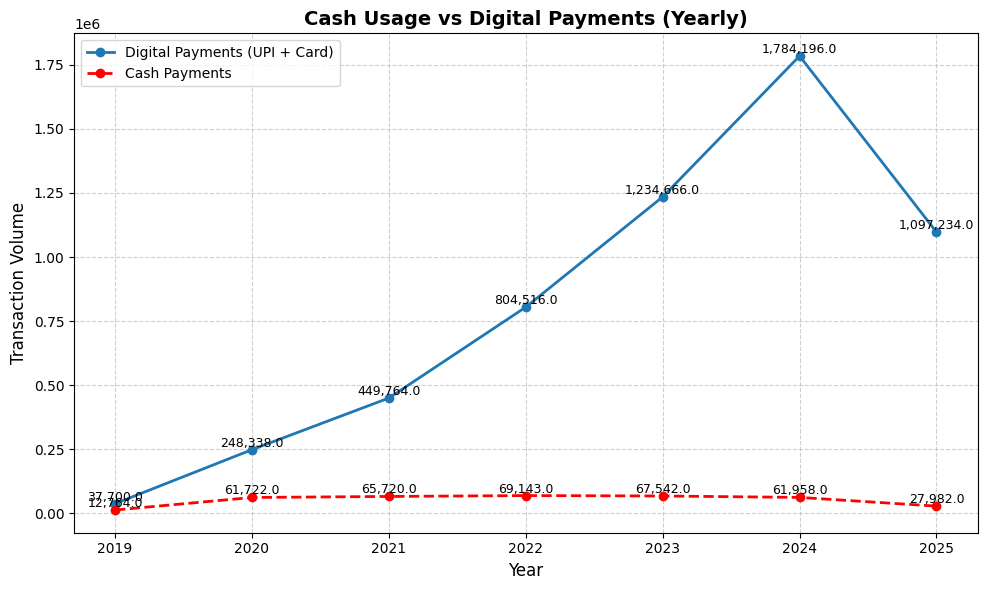

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df has: 'Year', 'UPI-Volume', 'Cash-Volume', 'Card-Volume'

# Aggregate by Year
yearly_data = df.groupby("Year")[["UPI-Volume", "Cash-Volume", "Card-Volume"]].sum().reset_index()

# Create Digital Payments column
yearly_data["Digital-Volume"] = yearly_data["UPI-Volume"] + yearly_data["Card-Volume"]

# Plot
plt.figure(figsize=(10,6))

# Digital Payments
plt.plot(yearly_data["Year"], yearly_data["Digital-Volume"], label="Digital Payments (UPI + Card)", marker="o", linewidth=2)
for x, y in zip(yearly_data["Year"], yearly_data["Digital-Volume"]):
    plt.text(x, y, f"{y:,}", ha="center", va="bottom", fontsize=9)

# Cash Payments
plt.plot(yearly_data["Year"], yearly_data["Cash-Volume"], label="Cash Payments", marker="o", linewidth=2, linestyle="--", color="red")
for x, y in zip(yearly_data["Year"], yearly_data["Cash-Volume"]):
    plt.text(x, y, f"{y:,}", ha="center", va="bottom", fontsize=9)

plt.title("Cash Usage vs Digital Payments (Yearly)", fontsize=14, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Transaction Volume", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


##### *Insights from the graph-*
The analysis shows that cash usage is steadily declining, while digital payments (UPI + Cards combined) are consistently increasing year by year. This shift highlights the growing adoption of digital modes over traditional cash, reflecting changing consumer behavior.

##### __*Caculating the proportion (%) of UPI, Cards, and Cash in Total Transactions Values*__

In [73]:
df = df.rename(columns={
    'UPI Transactions-Value(Crores)': 'UPI-Value',
    'Card Payments-Value(Crores)': 'Card-Value',
    'Cash Payemnts-Value(Crores)': 'Cash-Value'})
print(df.columns.tolist())

['Month', 'Year', 'UPI-Volume', 'UPI-Value', 'Card-Volume', 'Card-Value', 'Cash-Volume', 'Cash-Value', 'Total-Value']


In [82]:
import pandas as pd

# Step 1: Calculate total transaction value per row
df["Total-Value"] = df["UPI-Value"] + df["Card-Value"] + df["Cash-Value"]

# Step 2: Drop NaN rows if any
df = df.dropna()

# Step 3: Calculate percentages for each row
df["UPI-%"] = (df["UPI-Value"] / df["Total-Value"]) * 100
df["Card-%"] = (df["Card-Value"] / df["Total-Value"]) * 100
df["Cash-%"] = (df["Cash-Value"] / df["Total-Value"]) * 100

# Step 4: Group by year and take mean percentages
yearly = df.groupby("Year")[["UPI-%", "Card-%", "Cash-%"]].mean().reset_index()

# Final yearly proportion table
print(yearly)


     Year      UPI-%     Card-%     Cash-%
0  2019.0  32.312683  20.355177  47.332140
1  2020.0  44.548253  16.473410  38.978337
2  2021.0  59.647277  13.701220  26.651503
3  2022.0  69.958237  11.567489  18.474274
4  2023.0  76.294980   9.859160  13.845860
5  2024.0  81.303223   8.415398  10.281379
6  2025.0  83.629999   7.774241   8.595761


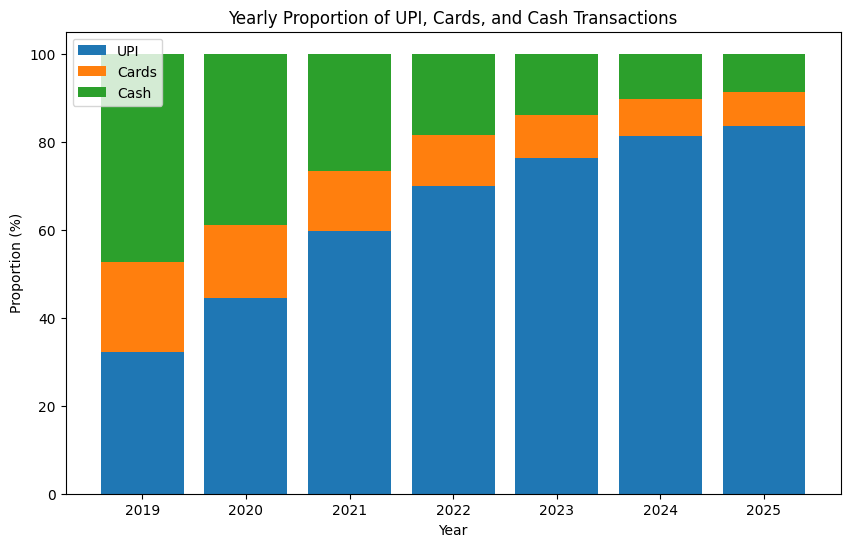

In [ ]:
import matplotlib.pyplot as plt

# Drop NaN rows
df = df.dropna()

plt.figure(figsize=(10,6))

# Stacked bar chart using percentages
plt.bar(yearly["Year"], yearly["UPI-%"], label="UPI")
plt.bar(yearly["Year"], yearly["Card-%"], bottom=yearly["UPI-%"], label="Cards")
plt.bar(yearly["Year"], yearly["Cash-%"], bottom=yearly["UPI-%"] + yearly["Card-%"], label="Cash")

plt.xlabel("Year")
plt.ylabel("Proportion (%)")
plt.title("Yearly Proportion of UPI, Cards, and Cash Transactions")
plt.legend()
plt.show()

##### *Insights from the graph-*
Initially, cash was the most preferred mode of transaction, but after COVID, digital adoption surged. UPI saw a sharp rise, quickly surpassing both cards and cash, and by 2025 it became the dominant payment method with over 80% share.
